### Task # 13:
- This is Task # 13 overall,and task 3 of Week 6
### Task # 03:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#### Problem # 3.1:
Classifying Loan Status Using Decision Trees
Dataset:
- Loan Data
Preprocessing Steps:
- Handle missing values if any.
- Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).
- Standardize numerical features.

Task:
- Implement a decision tree classifier to classify loan status and evaluate the model
using accuracy and ROC-AUC.

In [2]:
#importing the dataset
fp = 'loan_status.csv'

loan_df = pd.read_csv(fp)

#checking null values
print(loan_df.columns[loan_df.isnull().any()])

#a look at the dataset
loan_df.head(5)

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#the following columns ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']have the null values,
#so first lets deal with them 
#lets see the percentage of null values 
null_col = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
loan_df[null_col].isnull().sum()/loan_df.shape[0]*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

In [4]:
#so the percentage of null values doesnt seem to be very high , and also the variables are of such nature that if we predict them it can disturb the dataset
#lets create a copy of dataset and drop the null values from it while keeping the original same
loan_df2 = loan_df.copy()
loan_df2 = loan_df2.dropna()

#verifying the result
#checking null values
print(loan_df2.columns[loan_df2.isnull().any()])

Index([], dtype='object')


In [5]:
#by looking at the sample of dataframe
#some categorical values that we have to deal are Depandant,Loan Status,Education,Self Employeed,Gender , Married and Property Area
print(loan_df2['Loan_Status'].value_counts())
print(loan_df2['Dependents'].value_counts())
print(loan_df2['Education'].value_counts())
print(loan_df2['Self_Employed'].value_counts())
print(loan_df2['Property_Area'].value_counts())
print(loan_df2['Gender'].value_counts())
print(loan_df2['Married'].value_counts())

Loan_Status
Y    332
N    148
Name: count, dtype: int64
Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64
Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
Self_Employed
No     414
Yes     66
Name: count, dtype: int64
Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64
Gender
Male      394
Female     86
Name: count, dtype: int64
Married
Yes    311
No     169
Name: count, dtype: int64


- On the basis of above output we will use Manual label encoding for Loan Status,Gender,Married,Self Employeed, Education,Property Area while Depandants is already encoded we will just have to deal with 3+ value which are non exact numerical values

In [6]:
# label encoding the target variable manually
#label encoding for the target(Loan Status) variable
loan_df2.loc[loan_df2['Loan_Status']=='Y','Loan_Status',] = 1
loan_df2.loc[loan_df2['Loan_Status']=='N','Loan_Status',] = 0

#label encoding for Gender
loan_df2.loc[loan_df2['Gender']=='Male','Gender',] = 1
loan_df2.loc[loan_df2['Gender']=='Female','Gender',] = 0

#label encoding for Marital Status
loan_df2.loc[loan_df2['Married']=='Yes','Married',] = 1
loan_df2.loc[loan_df2['Married']=='No','Married',] = 0

#label encoding for Marital Status
loan_df2.loc[loan_df2['Self_Employed']=='Yes','Self_Employed',] = 1
loan_df2.loc[loan_df2['Self_Employed']=='No','Self_Employed',] = 0

#label encoding for Marital Status
loan_df2.loc[loan_df2['Property_Area']=='Rural','Property_Area',] = 0
loan_df2.loc[loan_df2['Property_Area']=='Semiurban','Property_Area',] = 1
loan_df2.loc[loan_df2['Property_Area']=='Urban','Property_Area',] = 2


#label encoding for Marital Status
loan_df2.loc[loan_df2['Education']=='Graduate','Education',] = 1
loan_df2.loc[loan_df2['Education']=='Not Graduate','Education',] = 0

#ensuring int datatype
loan_df2['Loan_Status'] = loan_df2['Loan_Status'].astype('int')
loan_df2['Gender'] = loan_df2['Gender'].astype('int')
loan_df2['Married'] = loan_df2['Married'].astype('int')
loan_df2['Self_Employed'] = loan_df2['Self_Employed'].astype('int')
loan_df2['Property_Area'] = loan_df2['Property_Area'].astype('int')
loan_df2['Education'] = loan_df2['Education'].astype('int')

In [7]:
# we have a 3+ which is not an exact numerical value so lets replace it with 4
loan_df2['Dependents'] = loan_df2['Dependents'].replace('3+', 4)
loan_df2['Dependents'] = loan_df2['Dependents'].astype('int')

In [8]:
#verifying the changes 
# print(loan_df2['Loan_Status'].value_counts())
# print(loan_df2['Dependents'].value_counts())
# print(loan_df2['Education'].value_counts())
# print(loan_df2['Self_Employed'].value_counts())
# print(loan_df2['Property_Area'].value_counts())
# print(loan_df2['Gender'].value_counts())
# print(loan_df2['Married'].value_counts())

In [9]:
#Again having look at the dataframe
# loan_df2.head(10)

- We can see that we have successfully converted the categorical values into numerical(Encoding) , now if we look closely at the dataframe we have some numerical that needs to be standardized such as Applicant Income,Coaaplicant Income , Loan Amount and Loan Amount Term
- Although the Decision Tree classifier is not that much sensitive to feature scaling, Decision Trees do not rely on the scale of the features. They make splits based on the threshold values of the features, so scaling doesn’t affect their performance.
- But we will do it for practice Purpose

In [10]:
#standardization
from sklearn.preprocessing import StandardScaler

# numerical features to be standardized
num_std = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
scaler = StandardScaler()
loan_df2[num_std] = scaler.fit_transform(loan_df2[num_std])

In [11]:
#so lets have a look at the final form of our dataset
loan_df2.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0
2,LP001005,1,1,0,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,1
3,LP001006,1,1,0,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1
4,LP001008,1,0,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2,1
5,LP001011,1,1,2,1,1,0.009319,0.999978,1.520245,0.275542,1.0,2,1
6,LP001013,1,1,0,0,0,-0.535332,-0.024893,-0.618413,0.275542,1.0,2,1


In [12]:
#defining features and Traget Vraiables as X and Y respectively
X = loan_df2.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_df2['Loan_Status']

In [13]:
#split for train and Test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
#decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=42)
DTC = DTC.fit(X_train,Y_train)

#prediction
Y_pred = DTC.predict(X_test)

Accuracy: 0.7708333333333334
ROC-AUC: 0.7121848739495799


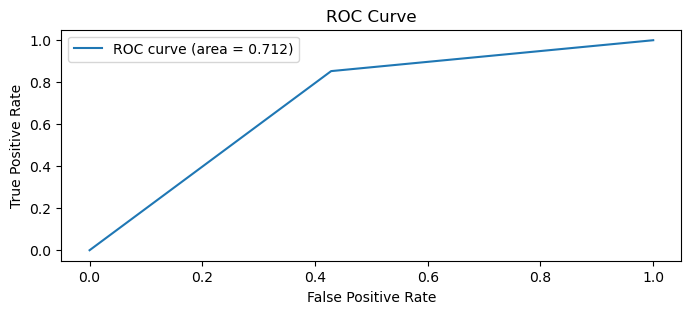

In [15]:
#evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# ROC-AUC
y_pred_proba = DTC.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, y_pred_proba)
print("ROC-AUC:", auc)

# Plot the ROC curve
plt.figure(figsize=(8,3))
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Problem # 3.2:
Predicting Hospital Readmission Using Logistic Regression
Dataset:
- Hospital Readmission Dataset
Preprocessing Steps:
- Handle missing values (e.g., fill missing values with mode for categorical variables).
- Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc.).
- Standardize numerical features.

Task:
- Implement logistic regression to predict hospital readmission and evaluate the model
using precision, recall, and F1-score

In [16]:
#importing dataset
fp = 'hospital_readmissions.csv'
hospital_df = pd.read_csv(fp)

#check for null
print(hospital_df.columns[hospital_df.isnull().any()])

#a look at the dataset
hospital_df.head(3)

Index([], dtype='object')


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [19]:
# Defining feature columns and target
feature_columns = hospital_df.columns[:-1]
target_column = 'readmitted'

In [25]:
# Preprocessing pipelines for numerical and categorical features
numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
categorical_features = ['age', 'n_procedures', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#This pipeline will be used for the standardization purpose
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

#this pipeline will be used for the one hot encoding purpose
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#here the columns transformations will take place
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [30]:
# Defining target Variable and other features as Y and X respectively 
X = hospital_df[feature_columns]
Y = hospital_df[target_column]

# Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [31]:
# Fitting and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transforming the test data
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Create the logistic regression model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

#### Problem # 3.3:
 Classifying Digit Images Using Decision Trees
Dataset:
- MNIST Dataset
Preprocessing Steps:
- Normalize pixel values.
- Reshape data as needed for model input.

Task:
- Implement a decision tree classifier to classify handwritten digits and evaluate the
model using accuracy and confusion matrix.

#### Problem # 3.4:
 Predicting Loan Approval Using Logistic Regression
Dataset:
- Loan Prediction Dataset
Preprocessing Steps:
- Handle missing values (e.g., fill missing values with mode for categorical variables).
- Encode categorical variables (e.g., one-hot encoding for gender, married status,
etc.).
- Standardize numerical features.

Task:
- Implement logistic regression to predict loan approval and evaluate the model using
accuracy and confusion matrix.


#### Problem # 3.5:
 Classifying Wine Quality Using Decision Trees
Dataset:
- Wine Quality Dataset
Preprocessing Steps:
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if present.

Task:
- Implement a decision tree classifier to classify wine quality (good/bad) and evaluate
the model using accuracy and ROC-AUC